In [2]:
#Импортируем все нужные библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [7]:
#Откроем Excel-файл

data = pd.read_excel('Когортный_анализ.xlsx')


In [6]:
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [9]:
#Напишем функцию, которая возвращает месяц и год по объекту datetime, а дни заменяет на 1

def get_month(x):
    return dt.datetime(x.year,x.month, 1)
    

In [10]:
#Добавим новый столбец с минимальной датой для каждой транзакции

data['month_year']=data['date'].apply(get_month)


In [11]:
data.head()

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


In [18]:
#Добавим новый столбец с минимальной датой для каждой транзакции

data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')


In [20]:
data.head(50)

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


In [22]:
#Напишем функцию, возвращающую год, месяц и день отдельными переменными

def get_date(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day



In [31]:
date_year, date_month, _ = get_date(data, 'date')
cohort_year, cohort_month, _ = get_date(data, 'cohortMonth')

In [ ]:
#Проставим когорты столбцом в датафрейме

data[‘cohort_index’]=year_diff * 12 + month_diff + 1



In [32]:
data.head()

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01


In [36]:
#создаем колонку cohort_index

# Преобразуем колонки в период (год-месяц) если они еще не в этом формате
data['month_year_period'] = data['month_year'].dt.to_period('M')
data['cohort_month_period'] = data['cohortMonth'].dt.to_period('M')

# Создаем cohort_index (разница в месяцах между заказом и когортой)
data['cohort_index'] = (data['month_year_period'] - data['cohort_month_period']).apply(lambda x: x.n)

print("Колонка 'cohort_index' создана успешно!")
print("Уникальные значения cohort_index:", sorted(data['cohort_index'].unique()))


Колонка 'cohort_index' создана успешно!
Уникальные значения cohort_index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [37]:
data['cohort_index'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
704835    0
704836    0
704837    0
704838    0
704839    0
Name: cohort_index, Length: 704840, dtype: int64>

In [41]:
#Получим классическую таблицу когортного анализа уголком

data1=data.pivot_table(index= 'cohortMonth',
                       columns='cohort_index',
                       values='user_id',
                       aggfunc=len)

print('Когортная таблица:')
data1

Когортная таблица:


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Видоизменим таблицу в проценты

first_column = data1.iloc[:,0]

retention = data1.div(first_column, axis=0)

retention.round(2)



cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


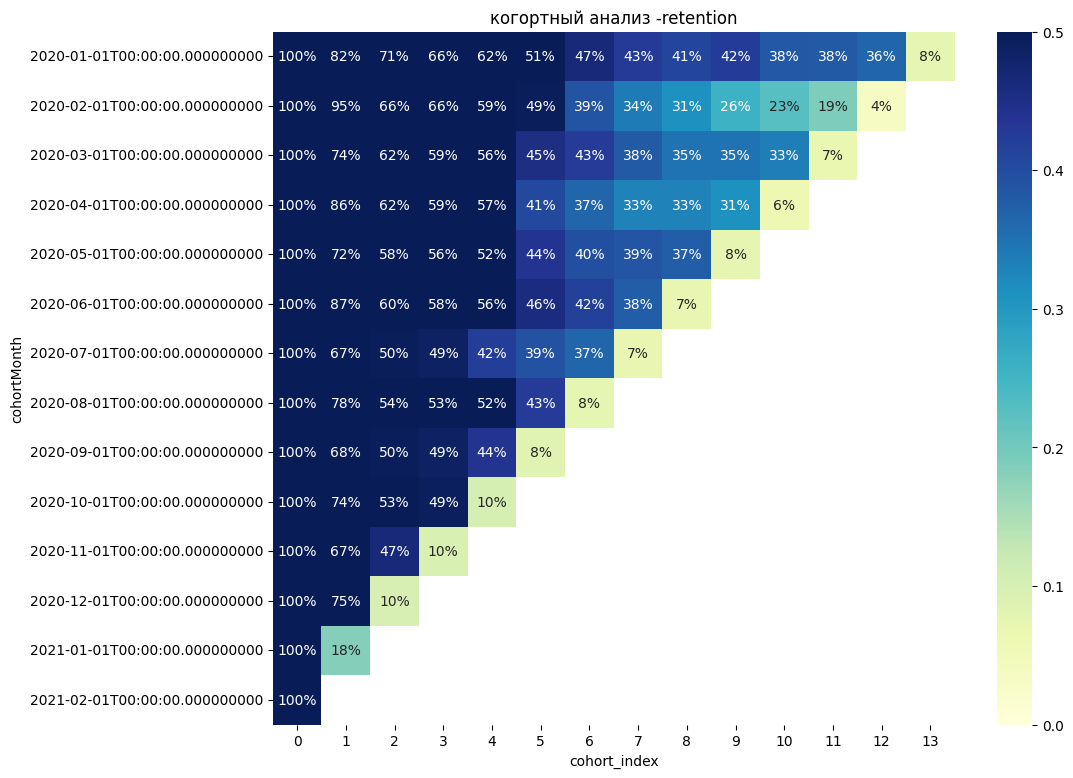

In [46]:
#Отформатируем таблицу

plt.figure(figsize=(11,9))
plt.title('когортный анализ -retention')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap='YlGnBu'
           )

plt.show()



In [47]:
# Проверим пропуски в данных
print("Пропуски в данных:")
print(data.isnull().sum())

# Проверим основные статистики
print("\nОсновные статистики:")
print(data.describe())

Пропуски в данных:
user_id                0
date                   0
price                  0
month_year             0
cohortMonth            0
month_year_period      0
cohort_month_period    0
cohort_index           0
dtype: int64

Основные статистики:
                                date          price  \
count                         704840  704840.000000   
mean   2020-09-12 00:52:37.441689088      81.403510   
min              2020-01-04 00:00:00      20.000000   
25%              2020-06-30 00:00:00      40.000000   
50%              2020-09-26 00:00:00      50.000000   
75%              2020-12-07 00:00:00     100.000000   
max              2021-02-06 00:00:00     300.000000   
std                              NaN      81.916181   

                          month_year                    cohortMonth  \
count                         704840                         704840   
mean   2020-08-28 06:06:33.607627520  2020-06-05 10:14:01.968105472   
min              2020-01-01 00:00:00 

In [52]:
# Когортный анализ по сумме покупок
cohort_revenue = data.pivot_table(
    index='cohortMonth',
    columns='cohort_index',
    values='price',
    aggfunc='sum'
)

# Retention по выручке (процент от первого месяца)
retention_revenue = cohort_revenue.divide(cohort_revenue[0], axis=0)

print("Когортный анализ по выручке:")
print(cohort_revenue)
print("\nRetention по выручке (%):")
print(retention_revenue)

Когортный анализ по выручке:
cohort_index         0          1         2         3         4         5   \
cohortMonth                                                                  
2020-01-01     662180.0   642990.0  608410.0  565650.0  547080.0  483840.0   
2020-02-01     536310.0   594210.0  445590.0  450500.0  409640.0  366150.0   
2020-03-01     873000.0   797300.0  680220.0  666890.0  646610.0  546210.0   
2020-04-01     648770.0   667480.0  526090.0  503450.0  482350.0  378620.0   
2020-05-01     992030.0   870090.0  737430.0  740850.0  699940.0  633220.0   
2020-06-01     718980.0   759810.0  563430.0  559150.0  545300.0  472750.0   
2020-07-01    1106840.0   913300.0  739440.0  735260.0  661290.0  634590.0   
2020-08-01     844520.0   800350.0  607090.0  586730.0  603010.0  517030.0   
2020-09-01    1164460.0   979070.0  784700.0  778600.0  710410.0  140880.0   
2020-10-01     945800.0   852960.0  693990.0  645470.0  129240.0       NaN   
2020-11-01    1215110.0  1012760.0 

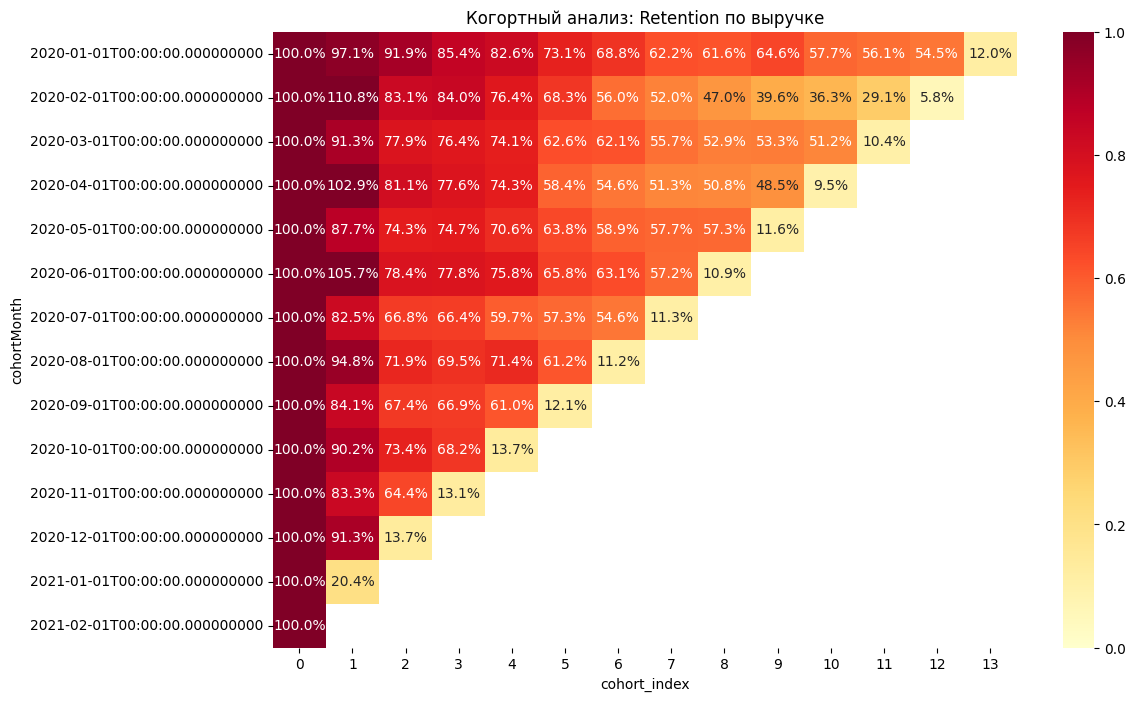

In [51]:
# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(data=retention_revenue, annot=True, fmt='.1%', cmap='YlOrRd', vmin=0.0, vmax=1.0)
plt.title('Когортный анализ: Retention по выручке')
plt.show()

In [49]:
# Анализ результатов
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("=" * 50)

# Анализ по пользователям
print("1. Анализ по количеству покупателей:")
print(f"   - Лучшая возвращаемость: когорта {retention.iloc[:,-1].idxmax().strftime('%Y-%m')}")
print(f"   - Худшая возвращаемость: когорта {retention.iloc[:,-1].idxmin().strftime('%Y-%m')}")

# Анализ по выручке  
print("\n2. Анализ по сумме покупок:")
print(f"   - Лучшая возвращаемость: когорта {retention_revenue.iloc[:,-1].idxmax().strftime('%Y-%m')}")
print(f"   - Худшая возвращаемость: когорта {retention_revenue.iloc[:,-1].idxmin().strftime('%Y-%m')}")

# Выбивающиеся когорты
print("\n3. Выбивающиеся когорты:")
# Найдем когорты с аномально высоким/низким retention
mean_retention = retention.iloc[:,1:].mean(axis=1)
anomalous = mean_retention[(mean_retention > mean_retention.mean() + mean_retention.std()) | 
                          (mean_retention < mean_retention.mean() - mean_retention.std())]

for cohort, value in anomalous.items():
    print(f"   - {cohort.strftime('%Y-%m')}: {value:.1%} (среднее: {mean_retention.mean():.1%})")

АНАЛИЗ РЕЗУЛЬТАТОВ:
1. Анализ по количеству покупателей:
   - Лучшая возвращаемость: когорта 2020-01
   - Худшая возвращаемость: когорта 2020-01

2. Анализ по сумме покупок:
   - Лучшая возвращаемость: когорта 2020-01
   - Худшая возвращаемость: когорта 2020-01

3. Выбивающиеся когорты:
   - 2021-01: 18.2% (среднее: 42.7%)


In [53]:
# Заключительный анализ
print("\n4. РЕКОМЕНДАЦИИ И ВЫВОДЫ:")
print("   - Когорты с лучшей возвращаемостью стоит исследовать на предмет:")
print("     * Маркетинговых активностей в те периоды")
print("     * Особенностей продукта/услуги")
print("     * Демографии пользователей")
print("   - Когорты с худшей возвращаемостью требуют анализа причин оттока")
print("   - Дополнительно стоит исследовать:")
print("     * Влияние сезонности")
print("     * Эффективность разных каналов привлечения")
print("     * Поведенческие паттерны пользователей")


4. РЕКОМЕНДАЦИИ И ВЫВОДЫ:
   - Когорты с лучшей возвращаемостью стоит исследовать на предмет:
     * Маркетинговых активностей в те периоды
     * Особенностей продукта/услуги
     * Демографии пользователей
   - Когорты с худшей возвращаемостью требуют анализа причин оттока
   - Дополнительно стоит исследовать:
     * Влияние сезонности
     * Эффективность разных каналов привлечения
     * Поведенческие паттерны пользователей
